### Наивный байесовский классификатор

Наивный байесовский классификатор (Naive Bayes classifier) - вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости.

[Байесовская фильтрация спама](https://ru.wikipedia.org/wiki/%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%BF%D0%B0%D0%BC%D0%B0)

Каждый текст (документ) представляется в виде BoW-вектора (Bag of Words, Count vectorization). 

Глобальная цель - предсказать метку класса, у которой максимальная вероятность при условии данных (документа)

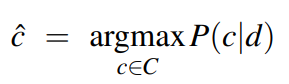

Для документа `d` и класса `c` по формуле Байеса можно получить:

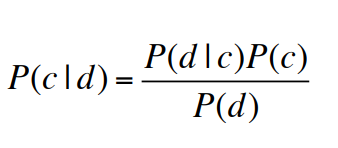

Тогда формулу для предсказанной вероятности метки класса можно переписать как

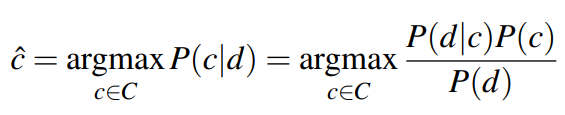

`P(d)` - вероятность документа не зависит от `c` и не меняется (константа) => для простоты можем ее убрать:

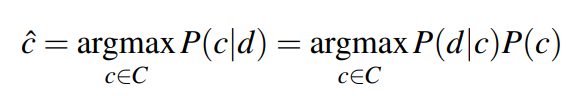


Итого для получения результата нам нужно посчитать 2 кусочка формулы:

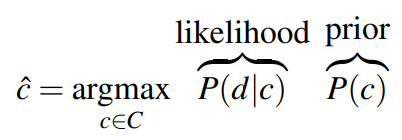

Без потери общности мы можем сказать, что `P(d|c)` можно переписать как

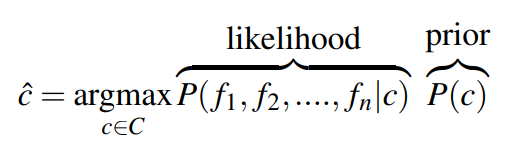

`P(c)` - просто доля класса

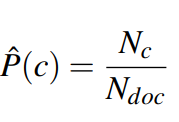

### Как упростить вычисления?

**Проблема**

Оценить `likelihood` сложно, придется посчитать все возможные комбинации признаков (в нашем случае все возможные множества слов, с учетом их позиций), что потребует огромное количество времени, параметров и данных.

**Решение**

Сделаем два предположения:

- позиция слов в предложении не важна (BoW)
- при условии класса слова независимы: 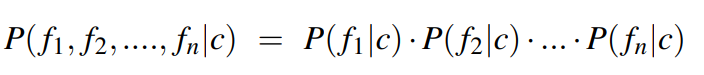

[Независимость (теория вероятностей)](Независимость (теория вероятностей))

Финально получаем:

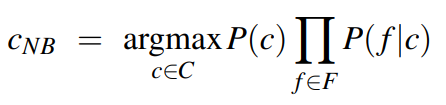

Для простоты вычислений стандартный трюк - логарифмирование

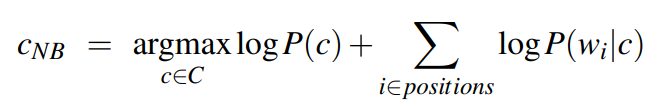

Как это посчитать?

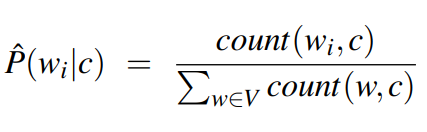

### Что если вероятность занулится?

**Опять проблема**

Предположим, для какого-то слова при условии какого-то класса получилась вероятность = 0. В процессе классификатор умножает вероятности, тогда у нас занулится все `P(w|c)`:

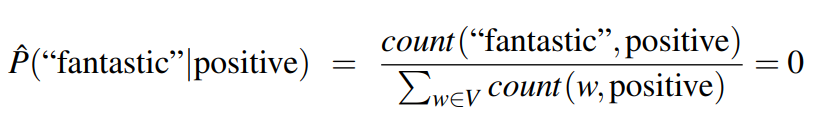

**Решение**

Еще один стандартный трюк - добавим сглаживание

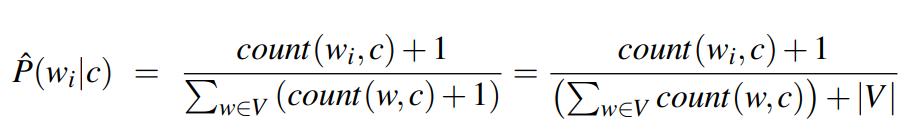


### Плюсы и минусы модели

**Основные преимущества** — простота реализации и низкие вычислительные затраты при обучении и классификации. В тех редких случаях, когда признаки почти независимы, наивный байесовский классификатор близок к оптимальному. 

Достаточно малое количество данных необходимо для обучения, оценки параметров и классификации. 
Высокая интерпретируемость модели.

**Основной недостаток** — низкое качество классификации в общем случае.

### Sklearn Implementation

[MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.rcParams["figure.figsize"] = (12, 8)

In [ ]:
data = fetch_20newsgroups()
text_categories = data.target_names
train_data = fetch_20newsgroups(subset="train", categories=text_categories)
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

In [ ]:
text_categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(train_data.data, train_data.target)
predicted_categories = model.predict(test_data.data)

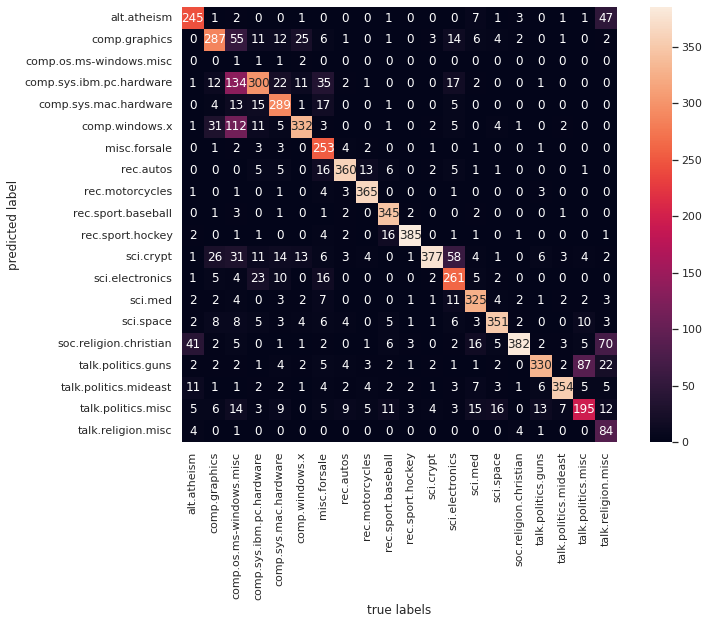

In [ ]:
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", xticklabels=train_data.target_names, yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [ ]:
print(classification_report(test_data.target, predicted_categories))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       319
           1       0.67      0.74      0.70       389
           2       0.20      0.00      0.01       394
           3       0.56      0.77      0.65       392
           4       0.84      0.75      0.79       385
           5       0.65      0.84      0.73       395
           6       0.93      0.65      0.77       390
           7       0.87      0.91      0.89       396
           8       0.96      0.92      0.94       398
           9       0.96      0.87      0.91       397
          10       0.93      0.96      0.95       399
          11       0.67      0.95      0.78       396
          12       0.79      0.66      0.72       393
          13       0.87      0.82      0.85       396
          14       0.83      0.89      0.86       394
          15       0.70      0.96      0.81       398
          16       0.69      0.91      0.79       364
          17       0.85    

### Что еще почитать

[Наивный Байесовский классификатор в 25 строк кода](https://habr.com/ru/post/120194/)

[Naive Bayes from Scratch in Python](https://kenzotakahashi.github.io/naive-bayes-from-scratch-in-python.html)

[How I was using Naive Bayes (Incorrectly) till now — Part-1](https://towardsdatascience.com/how-i-was-using-naive-bayes-incorrectly-till-now-part-1-4ed2a7e2212b)